In [2]:
import os
os.chdir('..')

In [3]:
import numpy as np
import scipy as sp
import datajoint as dj

In [4]:
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot, unit_characteristic_plot

Connecting root@127.0.0.1:3306


In [5]:
session_keys = experiment.Session.fetch('KEY')

In [6]:
session_key = session_keys[0]

# Plot Clustering Quality

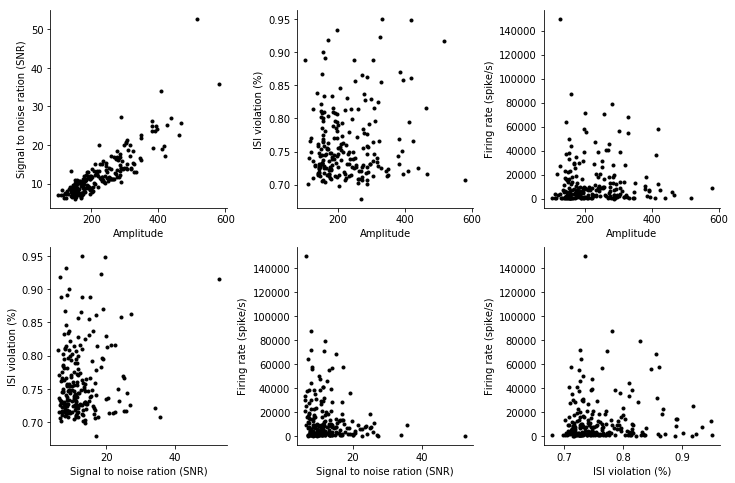

In [6]:
unit_characteristic_plot.plot_clustering_quality(session_key)

# Plot unit characteristic - overlay on probe

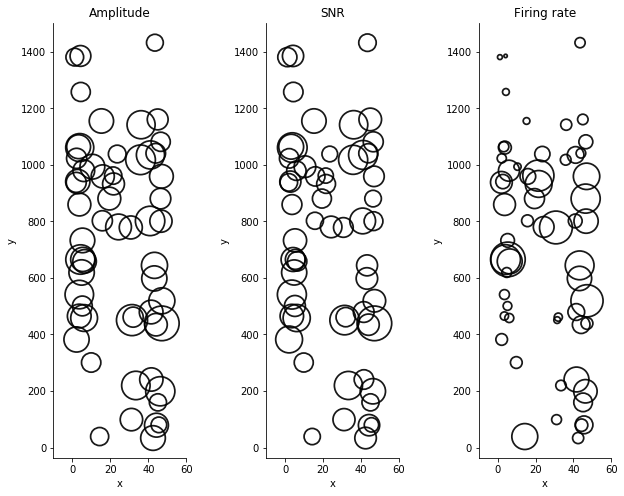

In [42]:
unit_characteristic_plot.plot_unit_characteristic(session_key)

# Plot unit selectivity - overlay on probe

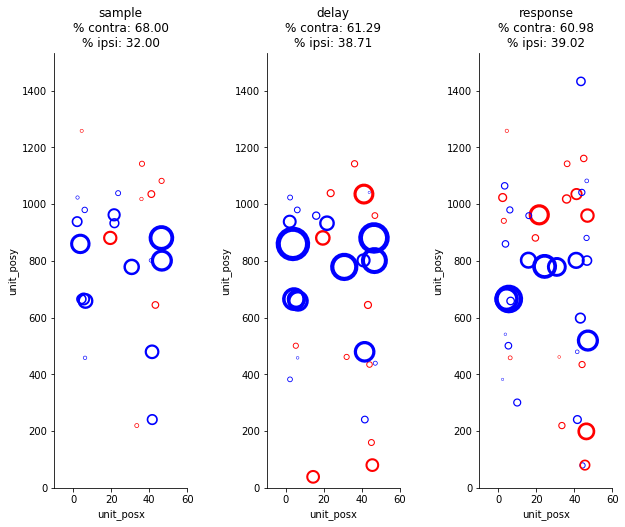

In [77]:
unit_characteristic_plot.plot_unit_selectivity(session_key)

In [76]:
import importlib
importlib.reload(unit_characteristic_plot)

<module 'pipeline.plot.unit_characteristic_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\unit_characteristic_plot.py'>